***<span style="font-size:24px;">Problem Description</span>***

A Chinese automobile company aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. Essentially, the company wants to know:

***Which variables are significant in predicting the price of a car***

***How well those variables describe the price of a car***

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.

***<span style="font-size:24px;">1. Loading and Preprocessing</span>***

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

In [3]:
data=pd.read_csv("CarPrice_Assignment.csv")

In [4]:
df=pd.DataFrame(data)

In [5]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [7]:
df.shape

(205, 26)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [9]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [10]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [11]:
df.duplicated().sum()

0

***<span style="font-size:20px;">OUTLIER DETECTION</span>***

In [12]:
num_col=df.select_dtypes(include=["number"])
num_col

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


***Boxplot to check outliers***

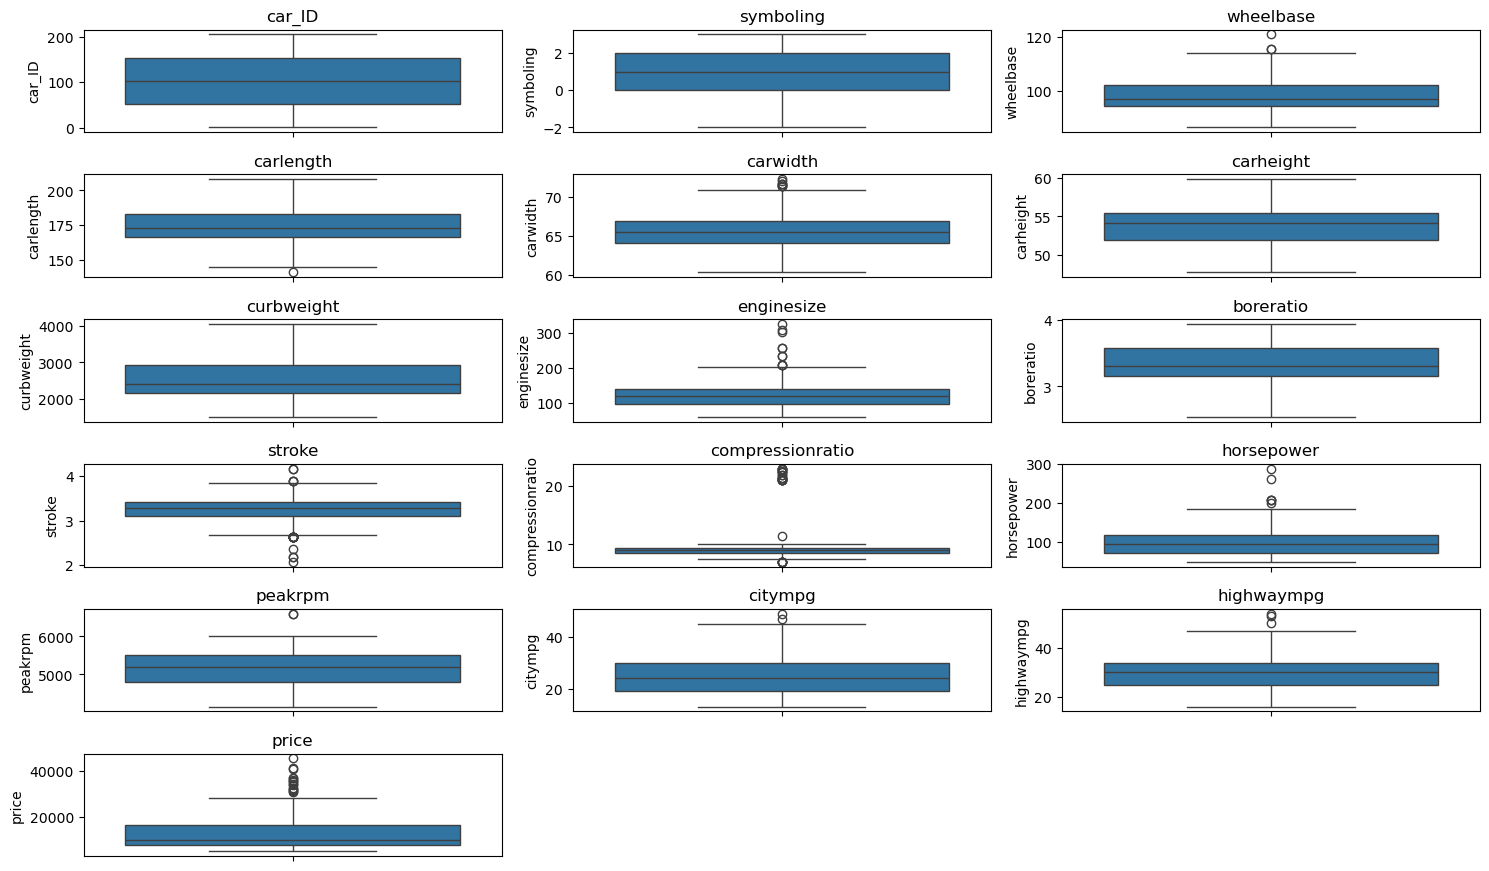

In [13]:
plt.figure(figsize=(15,100))
for x, col in enumerate(num_col):
   # plt.figure(figsize=(4,4))
    plt.subplot((len(num_col)+2)//3,3,x+1)
    sns.boxplot(df[col])
    plt.title(col)
    plt.show
plt.tight_layout()
plt.show()

***Entire box plot in one frame***

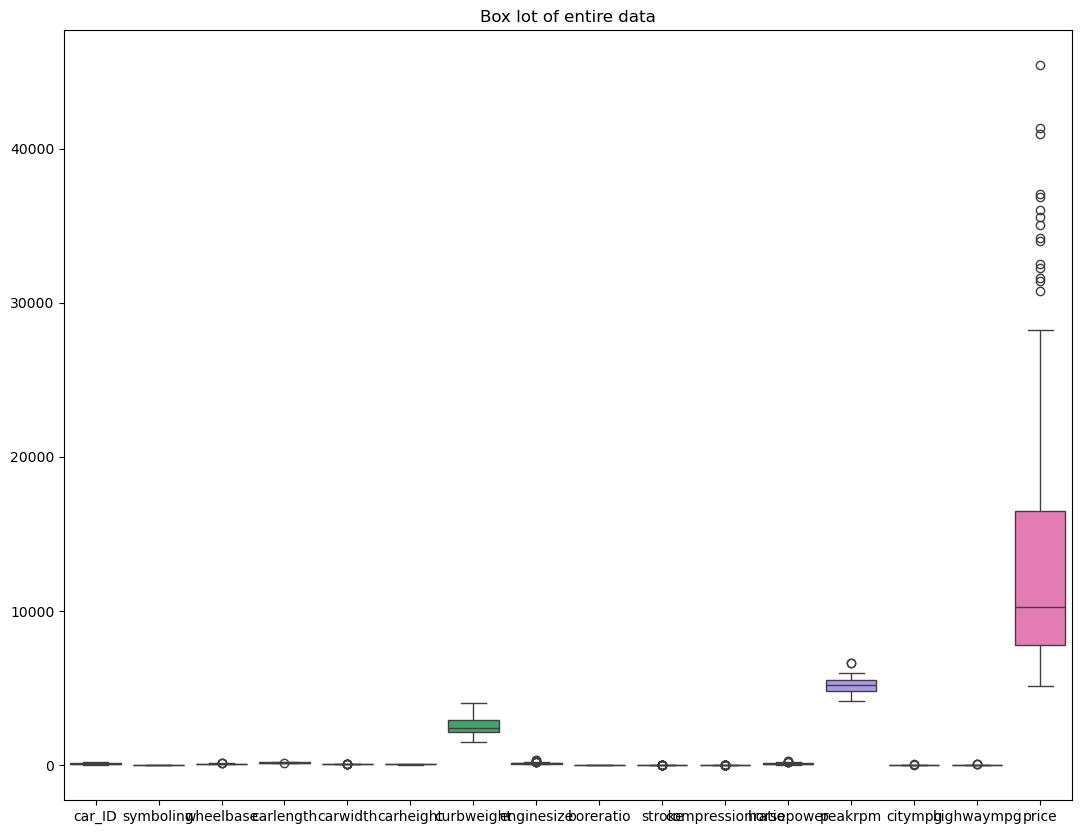

In [14]:
plt.figure(figsize=(13,10))
sns.boxplot(df)
plt.title("Box lot of entire data")
plt.show()

***HANDLING OUTLIERS***

In [15]:
num_col=df.select_dtypes("number")

In [16]:
for x in num_col:
    q1=df[x].quantile(0.25)
    q3=df[x].quantile(0.75)
    iqr=q3-q1
    lb=q1-(1.5*iqr)
    ub=q3+(1.5*iqr)
    # Apply capping
    df[x] = df[x].apply(lambda value: lb if value < lb else (ub if value > ub else value))

***Lets check skew to know whether IQR method worked***

In [17]:
df["price"].skew()

1.222030944709571

For Symmetrical Distribution (No Skewness)
Skewness ≈ 0


-0.5 to 0.5: Fairly symmetrical distribution (considered ideal).
-1 to -0.5 or 0.5 to 1: Moderately skewed but often acceptable for many analyses.


Less than -1 or greater than 1: Highly skewed, may require data transformation (e.g., log transformation, square root transformation)

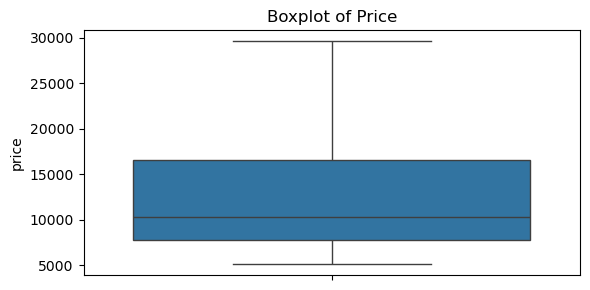

In [19]:
plt.figure(figsize=(6,3))
sns.boxplot(df['price'])
plt.title(f'Boxplot of Price')
plt.tight_layout()
plt.show()

In [20]:
num_cols=df.select_dtypes("number").columns

In [21]:
df[num_cols].skew()

car_ID              0.000000
symboling           0.211072
wheelbase           0.924916
carlength           0.155954
carwidth            0.776278
carheight           0.063123
curbweight          0.681398
enginesize          0.908453
boreratio           0.020156
stroke             -0.379130
compressionratio    0.035149
horsepower          0.814957
peakrpm             0.049935
citympg             0.604594
highwaympg          0.347441
price               1.222031
dtype: float64

***HANDLING SKEWNESS OF ALL NUMERICAL COLUMNS***

In [22]:
from sklearn.preprocessing import PowerTransformer


In [23]:
pt=PowerTransformer(method="yeo-johnson")

In [24]:
df[num_cols]=pt.fit_transform(df[num_cols])
df[num_cols].skew()

car_ID             -0.268636
symboling          -0.064508
wheelbase           0.003159
carlength          -0.000424
carwidth            0.000000
carheight          -0.002653
curbweight          0.024871
enginesize          0.021314
boreratio          -0.011526
stroke              0.011287
compressionratio    0.001809
horsepower          0.044124
peakrpm            -0.002338
citympg             0.000325
highwaympg         -0.006936
price               0.081616
dtype: float64

***HISTOGRAM OF NUMERIC COLUMNS AFTER CORRECTING SKEWNESS***

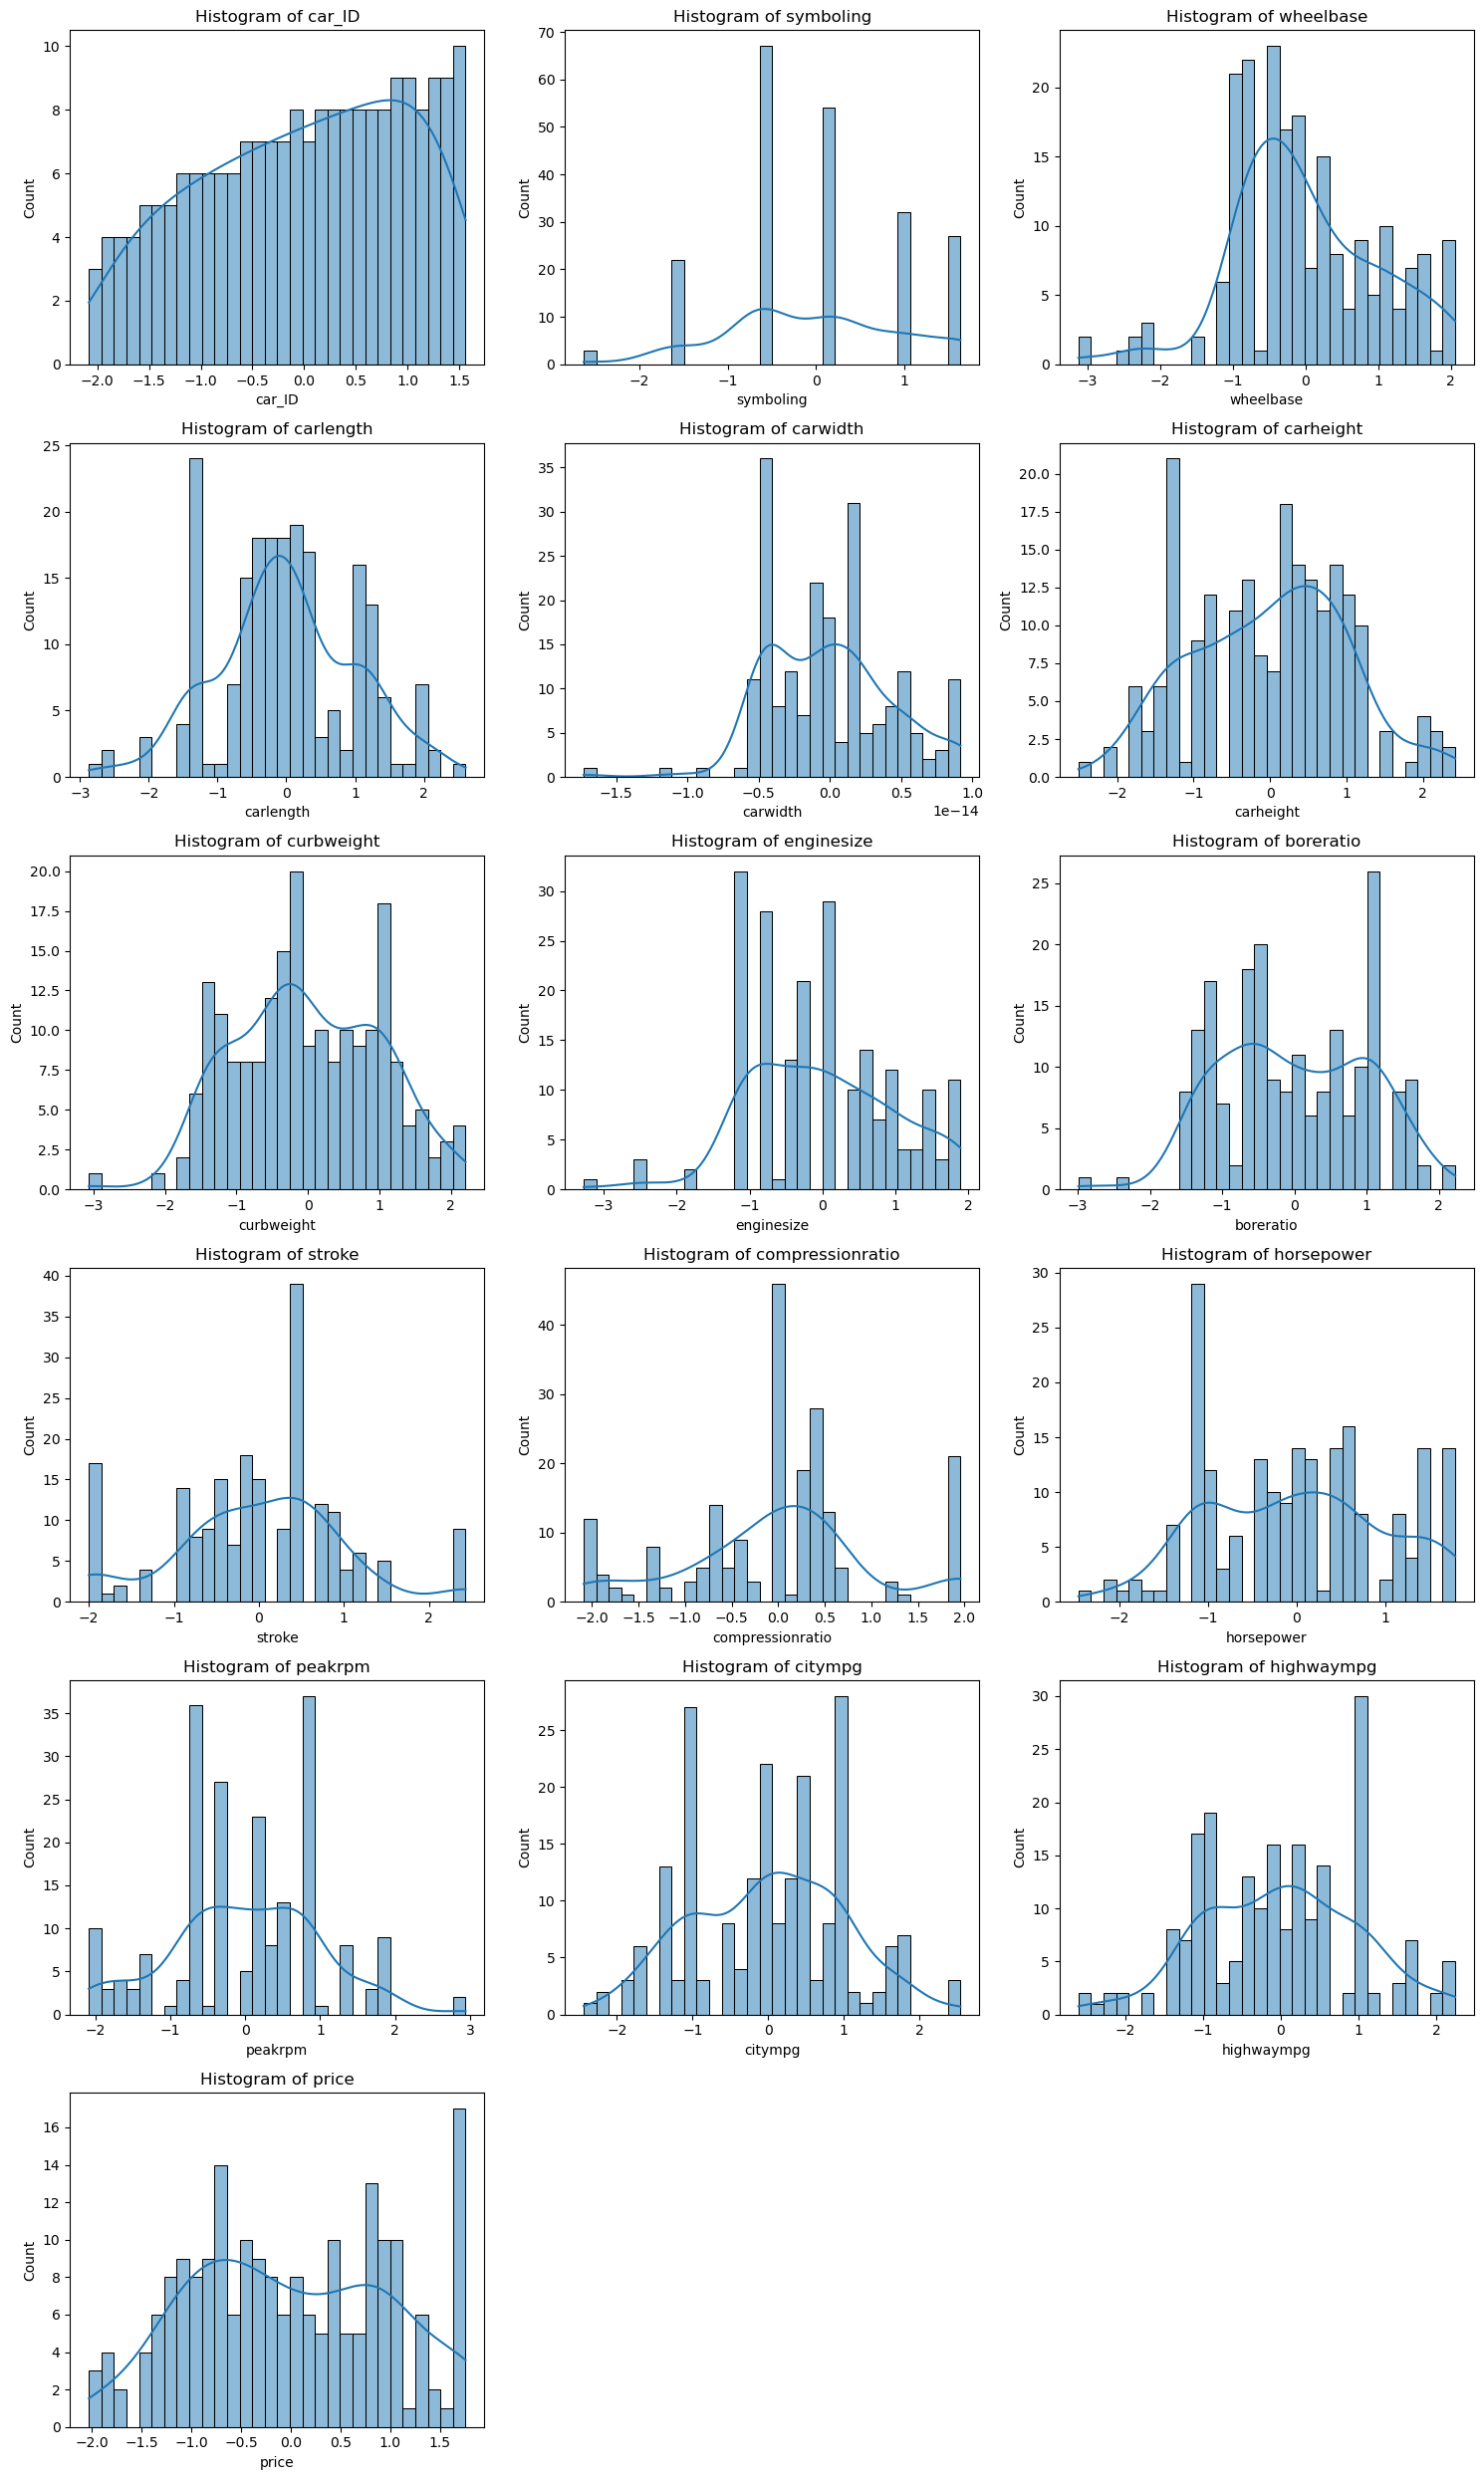

In [25]:
plt.figure(figsize=(15,25))
for i, col in enumerate(num_cols):
    plt.subplot(6,3,i+1)
    plt.title(f"Histogram of {col}")
    sns.histplot(df[col], bins=30, kde=True, edgecolor='black')
plt.tight_layout()
plt.show()  

***<span styple="font-size:18px;">ENCODING</span>***

***To convert nonnumerical values to numerical***

In [26]:
cat_col=df.select_dtypes(include=["object"])

In [27]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [28]:
df1=df.copy()

In [29]:
le = LabelEncoder()
for x in cat_col:
    df1[x]=le.fit_transform(df1[x])
    

In [30]:
df1.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,-2.080970,1.637336,2,1,0,1,0,2,0,-2.388079,...,0.378551,5,0.525135,-1.943130,-0.044148,0.465420,-0.254290,-0.590218,-0.503712,0.472284
1,-2.035319,1.637336,3,1,0,1,0,2,0,-2.388079,...,0.378551,5,0.525135,-1.943130,-0.044148,0.465420,-0.254290,-0.590218,-0.503712,0.852508
2,-1.993838,0.194880,1,1,0,1,2,2,0,-0.703782,...,0.937844,5,-2.448083,0.740436,-0.044148,1.345802,-0.254290,-0.979465,-0.668315,0.852508
3,-1.955206,0.939497,4,1,0,0,3,1,0,0.364326,...,-0.322568,5,-0.510857,0.463833,1.211504,0.216601,0.794396,-0.068606,-0.032312,0.537732
4,-1.918703,0.939497,5,1,0,0,3,0,0,0.294959,...,0.545752,5,-0.510857,0.463833,-1.316724,0.566871,0.794396,-1.189069,-1.370772,0.951580


***<span style="font-size:24px;">4. FEATURE SELECTION</span>***

In [31]:
X = df1.drop(columns = ['price'])
y = df1['price']

In [34]:
from sklearn.feature_selection import SelectKBest,f_regression,RFE

In [35]:
select=SelectKBest(score_func=f_regression,k=20)
X_new=select.fit_transform(X,y)

In [36]:
selected_features=X.columns[select.get_support()]
feature_score=pd.DataFrame({"Features":X.columns,"Score":select.scores_}).sort_values(by ="Score",ascending=False)

In [37]:
print(selected_features)

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'fuelsystem', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'citympg', 'highwaympg'],
      dtype='object')


In [38]:
X_selected=X[selected_features]

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X_selected,y,test_size=0.2,random_state=42)

In [41]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

***<span style="font-size:24px;">2. Model Implementation </span>***

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR

In [43]:
models={
    "1.Linear Regression":LinearRegression(),
    "2. Decision TreeRegressor": DecisionTreeRegressor(),
    "3. Random Forest Regressor": RandomForestRegressor(),
    "4. Gradient Boosting Regressor": GradientBoostingRegressor(),
    "5. Suppor Vector Regressor": SVR()
}

In [45]:
models.items()

dict_items([('1.Linear Regression', LinearRegression()), ('2. Decision TreeRegressor', DecisionTreeRegressor()), ('3. Random Forest Regressor', RandomForestRegressor()), ('4. Gradient Boosting Regressor', GradientBoostingRegressor()), ('5. Suppor Vector Regressor', SVR())])

In [47]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [48]:
results={}
for model_name,model in models.items():
    model.fit(X_train_scaled,y_train)
    y_pred=model.predict(X_test_scaled)
    mae=mean_absolute_error(y_test,y_pred)
    mse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    r2=r2_score(y_test,y_pred)
    results[model_name]={"MAE":mae,"MSE":mse,"RMASE":rmse,"R2 score":r2}

***Compare the performance of all the models based on R-squared, Mean Squared Error (MSE), and Mean Absolute Error (MAE).***

In [49]:
Result_df=pd.DataFrame(results).T
Result_df

,MAE,MSE,RMASE,R2 score
1.Linear Regression,0.261086,0.092832,0.304684,0.904761
2. Decision TreeRegressor,0.274064,0.109191,0.330441,0.887979
3. Random Forest Regressor,0.286202,0.100342,0.316769,0.897057
4. Gradient Boosting Regressor,0.222292,0.067534,0.259873,0.930715
5. Suppor Vector Regressor,0.283208,0.135672,0.368337,0.860811


***<span style="font-size:24px;">3. Model Evaluation</span>***

***Best Performing Model:                 Gradient Boosting Regressor***

***Justification:***

MAE (Mean Absolute Error) of Gradient Boosting Regressor: 0.222292

Indicates the model has the smallest average magnitude of error, making its predictions closer to actual values.


MSE (Mean Squared Error) of Gradient Boosting Regressor: 0.067534

A lower MSE indicates smaller squared errors, reducing the impact of large outliers.

RMSE (Root Mean Squared Error) of Gradient Boosting Regressor: 0.259873

RMSE penalizes large errors more heavily, and a lower RMSE suggests more precise predictions.

 R² Score of Gradient Boosting Regressor: 0.930715

An R² score close to 1 indicates that the model explains most of the variance in the target variable effectively.

***<span style="font-size:24px;">5. Hyperparameter Tuning</span>***

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
model=GradientBoostingRegressor(random_state=42)

In [52]:
#parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [54]:
# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=2
)

In [55]:
# Fit the GridSearchCV
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2', verbose=2)

In [56]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}


In [57]:
# Evaluate the best model on the test set
best_gbr = grid_search.best_estimator_
y_pred = best_gbr.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)


In [58]:
print("\nModel Evaluation Metrics:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")


Model Evaluation Metrics:
MAE: 0.23121283389963102
MSE: 0.07508251302196818
RMSE: 0.27401188481883076
R2 Score: 0.9229713738334667


***After hyperparameter tuning, MAE, MSE, and RMSE increased slightly, and R² decreased slightly.***

***This suggests that the default hyperparameters performed slightly better than the tuned ones.***